<a href="https://colab.research.google.com/github/itz-rakshitha5/Visual-Question-Answering/blob/main/AI_Visual_Q%26A(PROJECT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers==4.30.2 torchvision timm accelerate Pillow ipywidgets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7

In [ ]:
from transformers import BlipProcessor, BlipForQuestionAnswering
from PIL import Image
import torch
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

In [ ]:
upload_widget = widgets.FileUpload(
    accept='image/*', multiple=False, description='📤 Upload Image'
)

In [ ]:
question_widget = widgets.Text(
    placeholder='Type your question here...',
    description='❓ Question:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='100%')
)

In [ ]:
output = widgets.Output()

In [ ]:
def run_vqa(change=None):
    with output:
        clear_output()
        if not upload_widget.value:
            print("⚠️ Please upload an image.")
            return
        if not question_widget.value.strip():
            print("⚠️ Please enter a question.")
            return

        # Get uploaded image
        img_bytes = list(upload_widget.value.values())[0]['content']
        image = Image.open(BytesIO(img_bytes)).convert("RGB")

        # Display image
        display(image)

        # Process question
        question = question_widget.value.strip()
        print(f"💬 Q: {question}")

        # Run inference
        inputs = processor(image, question, return_tensors="pt")
        with torch.no_grad():
            generated_ids = model.generate(**inputs)
            answer = processor.decode(generated_ids[0], skip_special_tokens=True)
        print(f"✅ A: {answer}")

In [ ]:
ask_button = widgets.Button(description="💡 Get Answer", button_style='success')
ask_button.on_click(run_vqa)

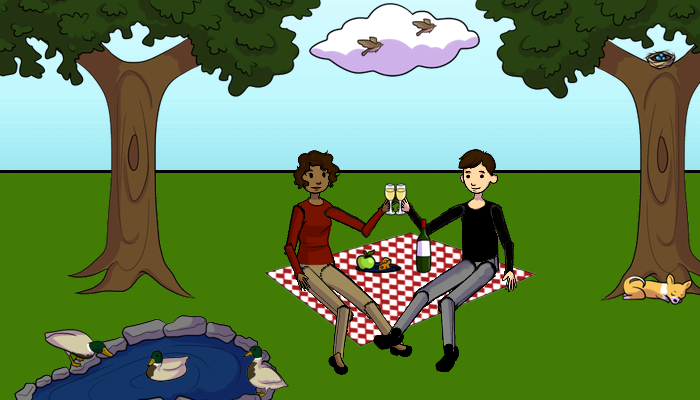

💬 Q: How many people are there?
✅ A: 2


In [ ]:
from io import BytesIO

display(widgets.VBox([
    upload_widget,
    question_widget,
    ask_button,
    output
]))